### Z Score Scaling

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'h':[150,160,170,180,190],
                   'w':[50,60,70,80,90]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [7]:
m = df.mean()
#print(mean)
s = df.std()
print(s)
z = (df-m)/s
z.round(2)

h    15.811388
w    15.811388
dtype: float64


,h,w
0,-1.26,-1.26
1,-0.63,-0.63
2,0.00,0.00
3,0.63,0.63
4,1.26,1.26


Text(0, 0.5, 'z value')

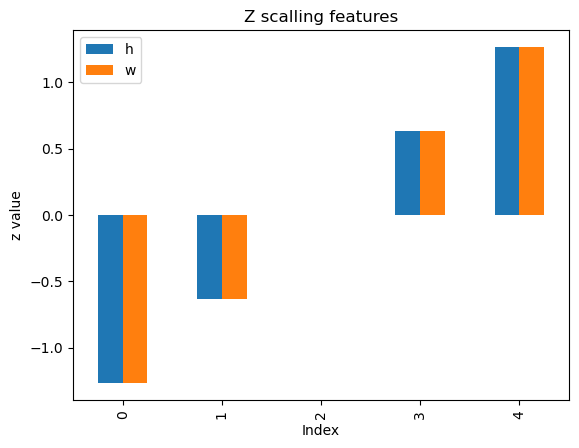

In [8]:
z.plot(kind='bar')
plt.title("Z scalling features")
plt.xlabel("Index")
plt.ylabel("z value")

### Min-Max Scaling

In [ ]:
df = pd.DataFrame({'h':[150,175,170,180,190],
                   'w':[50,60,70,80,90]}) 

In [9]:
# Step 1: Min, Max, Range
min = df.min()
max = df.max()
rg = max-min
min, max, rg

(h    150
 w     50
 dtype: int64,
 h    190
 w     90
 dtype: int64,
 h    40
 w    40
 dtype: int64)

In [11]:
# Step 2: Shift to zero
ss = df-min
ss.head()

,h,w
0,0,0
1,10,10
2,20,20
3,30,30
4,40,40


In [12]:
# Step 3 : Divide by range
mm = ss/rg
mm.round(2)

,h,w
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


Text(0, 0.5, 'Min-Max Value')

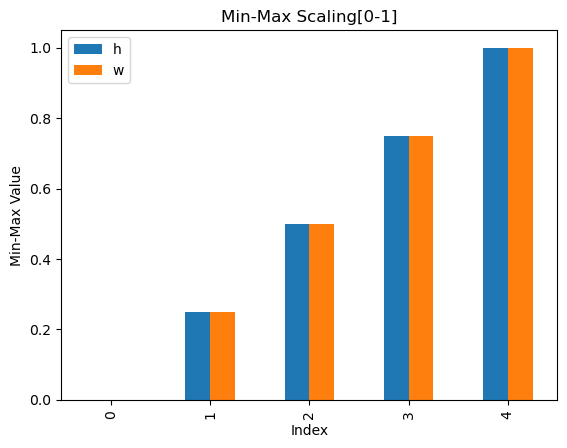

In [13]:
# Plot
mm.plot(kind='bar')
plt.title("Min-Max Scaling[0-1]")
plt.xlabel("Index")
plt.ylabel("Min-Max Value")

### Robust Scaling (outlier resistance)

In [17]:
df = pd.DataFrame({'h':[150,160,170,180,300],
                   'w':[50,60,70,80,200]}) 

In [18]:
# step 1: median, quartile, IQR
md = df.median()
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3-q1
md , q1, q3, iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [19]:
# step 2: center by median
ct = df-md
ct

,h,w
0,-20.0,-20.0
1,-10.0,-10.0
2,0.0,0.0
3,10.0,10.0
4,130.0,130.0


In [22]:
# Step 3: divide by IQR
rb = ct/iqr
rb.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


Text(0, 0.5, 'Robust Value')

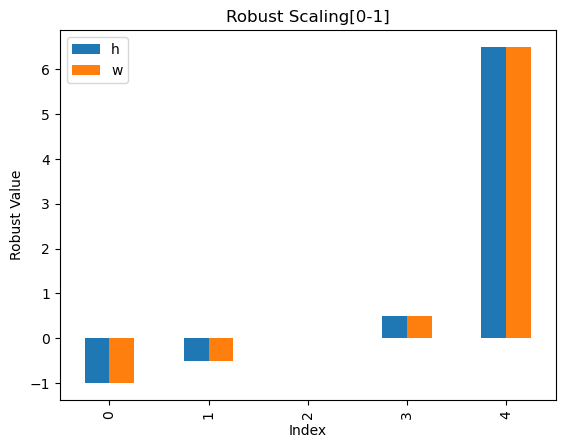

In [23]:
# visualize robust scaled value
rb.plot(kind='bar')
plt.title("Robust Scaling[0-1]")
plt.xlabel("Index")
plt.ylabel("Robust Value")

### Nominal Vs Ordinal Variables and One Hot Encoding

In [1]:
import pandas as pd
df = pd.DataFrame({
    'id':[1,2,3,4],
    'color':['red','blue','green','red'],
    'size':['small','medium','large','medium'],
    'price':[10,12,15,11]
})
df

,id,color,size,price
0,1,red,small,10
1,2,blue,medium,12
2,3,green,large,15
3,4,red,medium,11


In [2]:
# Step 2: Apply one-hot encoding to the color column
d_color = pd.get_dummies(df['color'], prefix="color", dtype=int)

In [3]:
# Step 3: Combine the new colums back with the original data
df_encoded = pd.concat([df,d_color], axis = 1)

In [5]:
# Step 4: Drop the old color column if you no longer need it
df_encoded = df_encoded.drop("color", axis = 1)
print(df_encoded)

   id    size  price  color_blue  color_green  color_red
0   1   small     10           0            0          1
1   2  medium     12           1            0          0
2   3   large     15           0            1          0
3   4  medium     11           0            0          1


### Ordinal Encoding

In [14]:
import pandas as pd
df = pd.DataFrame({
    'id':[1,2,3,4],
    'color':['red','blue','green','red'],
    'size':['small','medium','large','medium'],
    'price':[10,12,15,11]
})
df

,id,color,size,price
0,1,red,small,10
1,2,blue,medium,12
2,3,green,large,15
3,4,red,medium,11


In [15]:
# Step 2: declare the ordinal order
order = {"small":1,"medium":2,"large":3}

In [16]:
# Step 3: convert the whole feature
df["size_encoded"] = df["size"].map(order).astype(int)
df

,id,color,size,price,size_encoded
0,1,red,small,10,1
1,2,blue,medium,12,2
2,3,green,large,15,3
3,4,red,medium,11,2


In [17]:
# Step 4: Drop the old color column if you no longer need it
df["size"] = df["size"].map(order).astype(int)
df

,id,color,size,price,size_encoded
0,1,red,1,10,1
1,2,blue,2,12,2
2,3,green,3,15,3
3,4,red,2,11,2


### Understanding Vectors, Dot Product, and Norms

In [18]:
# Step 1: Creating Vector
import numpy as np    
# Two tiny 3D vectors
a = np.array([2,1,3])
b = np.array([1,3,3])
print(a)
print(b)

[2 1 3]
[1 3 3]


In [19]:
# Step 2: Vector Operation (Addition and Subtraction)
add_ab = a+b
sub_ab = a-b
print(add_ab)
print(sub_ab)

[3 4 6]
[ 1 -2  0]


In [20]:
# Step 3: Dot Product (Similarity of Direction)
# Mnual dot product: sum of pairwise products
dot = a[0]*b[0] + a[1]*b[1] + a[2]*b[2] 
dot_np = a@b # np.dot(a,b)
print(dot)
print(dot_np)

14
14


In [23]:
# Step 4: Norms (Length or Magnitude of a vector)
# L2 norm, the usual length
l2_a = np.linalg.norm(a)
print(l2_a)
l1_a = np.linalg.norm(a, ord = 1)
print(l1_a)

3.7416573867739413
6.0


In [29]:
# Step 5: Normalizing a Vector (Unit Vector)
unit_a = a/np.linalg.norm(a)
len_unit_a = np.linalg.norm(unit_a)
print(unit_a)
print(len_unit_a)

[0.53452248 0.26726124 0.80178373]
1.0


### Euclidean and Manhattan Distance

In [30]:
import numpy as np 
X = np.array([
    [70,80], #S1
    [60,90], #S2
    [85,60], #S3
    [78,76], #S4
    [62,65], #S5
], dtype=float)

q = np.array([75,70], dtype = float)
print("X SHAPE: ", X.shape)
print("q: ", q.tolist())

X SHAPE:  (5, 2)
q:  [75.0, 70.0]


In [31]:
# Euclidean distance (L2)
eu = np.linalg.norm(X-q, axis=1)
print("Euclidean: ",np.round(eu,3).tolist())

Euclidean:  [11.18, 25.0, 14.142, 6.708, 13.928]


In [32]:
# Manhattan Distance (L1)
ma = np.linalg.norm(X-q, ord=1, axis=1)
print("Manhattn: ", ma.tolist())

Manhattn:  [15.0, 35.0, 20.0, 9.0, 18.0]
